## 1. Dataset Loading, train-val-test split:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
def load_data(path):
    return np.genfromtxt(path, delimiter=',')

# Splitting the dataset into training, validation, and test sets
def split_data(data, train_size, validate_size, test_size):
    np.random.shuffle(data)
    n = len(data)
    train_end = int(n * train_size)
    validate_end = train_end + int(n * validate_size)

    return data[:train_end], data[train_end:validate_end], data[validate_end:]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

data = load_data('/content/diabetes.csv')

# Splitting the data
train_data, val_data, test_data = split_data(data, 0.7, 0.15, 0.15)

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Scaling the features for better convergence
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

## 2. Training Code:

In [23]:
class LogisticRegression:

    def __init__(self, lr=0.01, max_iter=500):
        self.lr = lr
        self.max_iter = max_iter
        self.loss_history = []

    def fit(self, X, y):
        # Initializing weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.max_iter):
            # Computing model predictions
            model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(model)

            # Calculating the loss
            loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.loss_history.append(loss)

            # Gradient descent
            dw = np.dot(X.T, (predictions - y)) / len(y)
            db = np.sum(predictions - y) / len(y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(model)
        return np.round(predictions)

    def accuracy(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

## 3. Train and Validate the Model:

In [24]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
  logreg = LogisticRegression(lr, max_iter=500)
  logreg.fit(X_train, y_train)
  val_acc = logreg.accuracy(X_val, y_val)
  results.append((lr,val_acc))
  print(results)


[(0.1, 0.7913043478260869)]
[(0.1, 0.7913043478260869), (0.01, 0.7739130434782608)]
[(0.1, 0.7913043478260869), (0.01, 0.7739130434782608), (0.001, 0.7652173913043478)]
[(0.1, 0.7913043478260869), (0.01, 0.7739130434782608), (0.001, 0.7652173913043478), (0.0001, 0.782608695652174)]


## 5. Train Loss vs Epoch Graph:

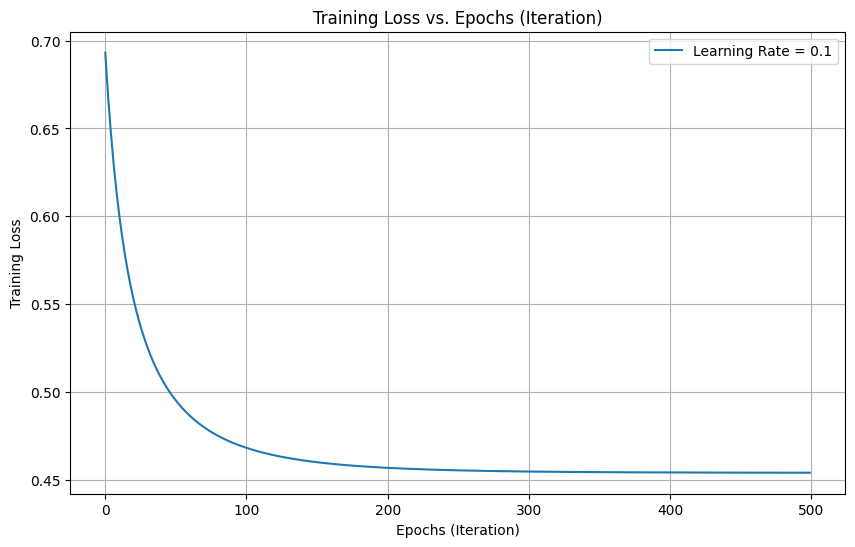

Test Accuracy with best learning rate (0.1): 0.7241379310344828


In [25]:
# Training the model using the best learning rate
best_lr = max(results, key=lambda x: x[1])[0]
logreg_best = LogisticRegression(lr=best_lr, max_iter=500)
logreg_best.fit(X_train, y_train)

# Calculating test accuracy
test_acc = logreg_best.accuracy(X_test, y_test)

# Plotting training loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(logreg_best.loss_history, label=f"Learning Rate = {best_lr}")
plt.title("Training Loss vs. Epochs (Iteration)")
plt.xlabel("Epochs (Iteration)")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

print(f"Test Accuracy with best learning rate ({best_lr}): {test_acc}")
